In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-22 18:02:47.389601


<h1>Dummy-muuttujien yhteenveto selittävän muuttujan mukaan</h1>

Dummy-muuttujaksi (binäärinen, dikotominen) kutsutaan muuttujaa, joka saa arvokseen joko 0 (joskus tämän sijasta käytetään tyhjää solua) tai 1. 

Esimerkiksi kyselytutkimuksessa monivalintakysymys, jonka vaihtoehdoista vastaaja saa valita useammankin kuin yhden, koodataan dummy-muuttujiksi: Jokainen kysymyksen vaihtoehto on muuttuja, joka saa arvokseen 1, jos vastaaja on sen valinnut. Muussa tapauksessa arvo on 0 tai tyhjä.

Tärkeää! Usein valintakysymyksiä (saa valita vain yhden vaihtoehdon) kutsutaan virheellisesti monivalintakysymyksiksi. Valintakysmystä ei kannata koodata dummy-muuttujiksi paitsi koneoppimisen malleja käytettäessä.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Grafiikan tulostaminen Jupyter notebookiin
# Nykyisissä kirjastoversioissa ei enää tarpeellinen
%matplotlib inline

In [3]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Yhteenvetoon otettavien dummy-muuttujien nimet
monivalinta = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

In [5]:
# Valintojen lukumäärät sukupuolen mukaan
df1 = df.groupby('sukup')[monivalinta].sum()

# Miesten ja naisten lukumäärät
miehet = df['sukup'][df['sukup'] == 1].count()
naiset = df['sukup'][df['sukup'] == 2].count()

# Prosenttien laskenta: iloc[0] viittaa taulukon ensimmäiseen riviin ja iloc[1] toiseen riviin
df1.iloc[0] = df1.iloc[0] / miehet * 100
df1.iloc[1] = df1.iloc[1] / naiset * 100

# Riviotsikoiden viimeistely
df1.index = ['Mies, n = ' + str(miehet) , 'Nainen, n = ' + str(naiset)]

# Prosenttilukujen ulkoasun viimeistely
df1.style.format('{:.1f} %', decimal = ',')

,työterv,lomaosa,kuntosa,hieroja
"Mies, n = 63","55,6 %","25,4 %","12,7 %","20,6 %"
"Nainen, n = 19","63,2 %","21,1 %","5,3 %","47,4 %"


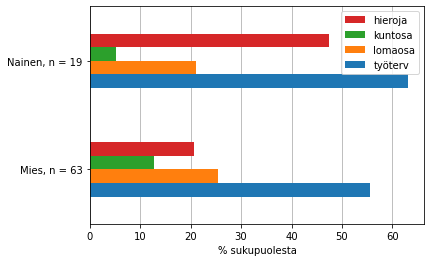

In [6]:
# Vaakapylväskaavio (legend = 'reverse' kääntää selitteen järjestyksen) 
df1.plot.barh(legend = 'reverse', zorder = 2)

# x-akselin otsikko
plt.xlabel('% sukupuolesta')

# Pystysuuntainen taustaviivoitus
plt.grid(axis = 'x')

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/